# 1. Analyze the data using the same techniques as for the last assignment.
Decide for yourself which and how to use the specific commands. Answer
the following questions in the report and include figures supporting your
answers:

In [181]:
import pandas as pd

df = pd.read_csv('housing.csv', sep="\s+")

The columns mean following:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 USD
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s USD

## 1.1. Which noteworthy trends of features and relations between features as well as features and regression target do you see?

In [182]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [183]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Check for empty data cells

In [185]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Check the distribution of the target feature, the house price.
The values are distributed normally with a few outliers which need to be eliminated.

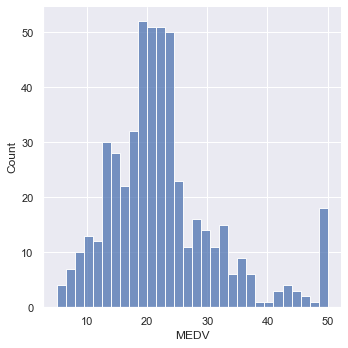

In [186]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['MEDV'], bins=30)
plt.show()

Check for correlated features

In [187]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


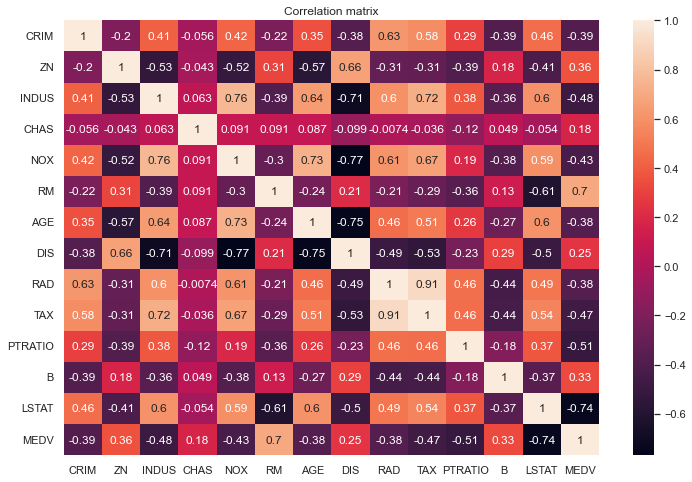

In [188]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

For example higher crime rates (CRIM) results in lower average house prices (MEDV), that's why there is a negative correlation.
The house prises (MEDV) are also lower for people with lower status (LSTAT).
The target feature is MEDV, relevant features are probably the ones with a high correlation.
I would choose LSTAT, TAX, RAD, RM, PTRATIO, NOX, INDUS because they correlate with MEDV the most..

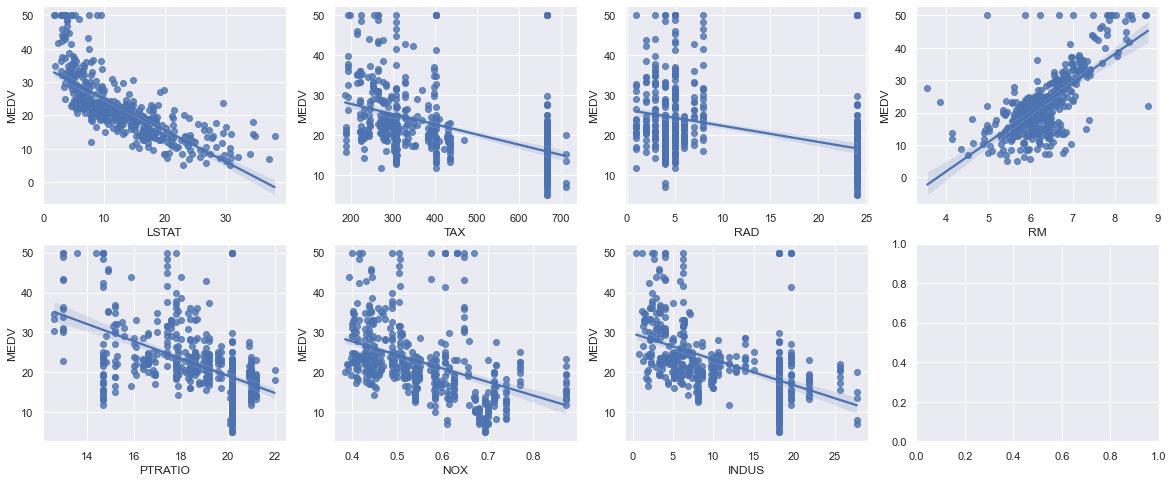

In [189]:
figure, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
cols = ['LSTAT', 'TAX', 'RAD', 'RM', 'PTRATIO', 'NOX', 'INDUS']
for col, ax in zip(cols, ax.flat):
    sns.regplot(x=df[col], y=df['MEDV'], ax=ax)

Outlier detection with box plot

In [190]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1080x720 with 0 Axes>

## 1.2. Which features would you choose to train the regression models, any why?

Probably LSTAT and RM, because they correlate highly with MEDV, looking at the correlation matrix.
Either RAD or TAX can be removed because they correlate highly and both together won't bring any benefit.

# 2. Build up your ML toolchain for this regression problem similar to the one you did for the classification and again take care of the following points:

Select features (as default all features get used)

In [191]:
X = df.drop(columns=['MEDV'], inplace=False)
y = df['MEDV']

In [192]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Remove outliers

In [193]:
X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1, inplace=True)
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375175,11.304348,11.118875,0.069170,0.554770,6.287106,68.584506,3.778529,9.549407,407.794466,18.454743,356.715751,12.642073
std,6.908970,23.112644,6.809112,0.253994,0.115773,0.678876,28.127163,2.052652,8.707259,167.791388,2.154109,91.133441,7.074084
min,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500


Centering and scaling the values

<AxesSubplot:ylabel='Density'>

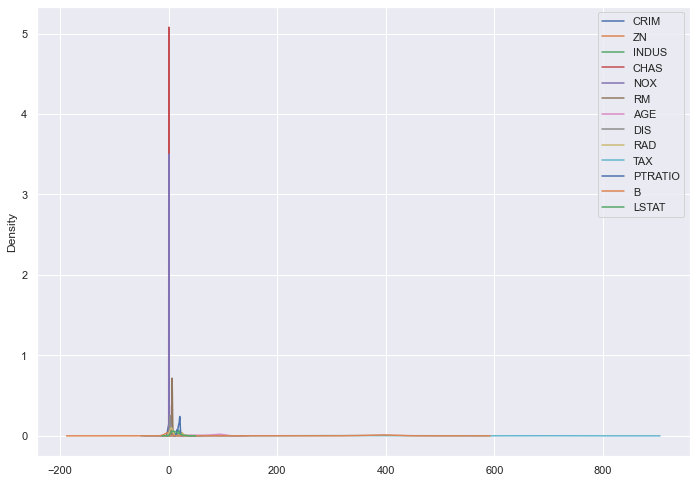

In [194]:
X.plot.density()

In [195]:
from sklearn import preprocessing

scalar = preprocessing.StandardScaler().fit(X, y)
X_Scaled = pd.DataFrame(scalar.transform(X), columns=X.columns)

<AxesSubplot:ylabel='Density'>

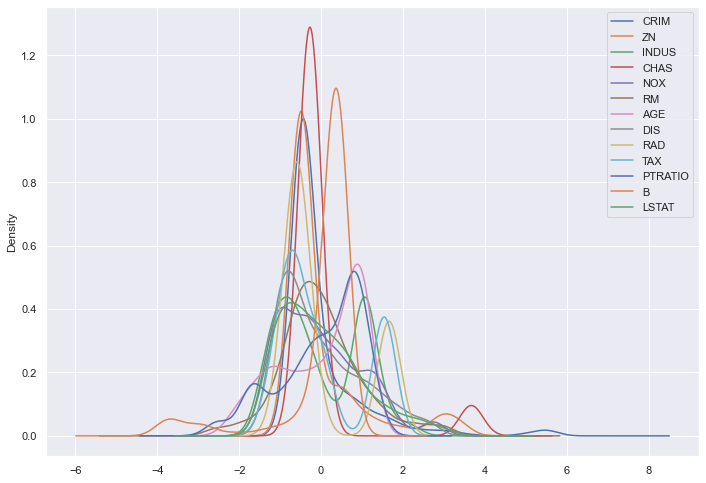

In [196]:
X_Scaled.plot.density()

## 2.2. Train/Test split

Train/Test split with a split of 30/70.

In [197]:
import numpy as np
from sklearn.model_selection import train_test_split

# splitting the dataframe into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.30,random_state=57)

Reduce features with pca (needs to be done after train/test split)

In [198]:
X_Scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [199]:
from sklearn.decomposition import PCA

# approx. half of the features get used
#pca = PCA(n_components=7)
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)


## 2.3. Use the following Regression models with different hyperparameter settings (where applicable) and an appropriate cross-validation setup for your training:


### 2.3.1. Linear Regression

In [200]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

linear_model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

linear_model_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",poly_model_cv.best_params_)
print("best accuracy :",poly_model_cv.best_score_)

cv_results = pd.DataFrame(linear_model_cv.cv_results_)
cv_results


Fitting 5 folds for each of 13 candidates, totalling 65 fits
tuned hpyerparameters :(best parameters)  {'poly__degree': 2}
best accuracy : 0.833922361736984


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013630,0.001608,0.002026,0.000916,1,{'n_features_to_select': 1},0.374792,0.565017,0.570907,0.331657,...,0.455377,0.097575,13,0.544289,0.536455,0.526198,0.567720,0.561310,0.547195,0.015396
1,0.014902,0.002063,0.002505,0.000630,2,{'n_features_to_select': 2},0.627235,0.770638,0.715947,0.476584,...,0.641515,0.100211,12,0.656324,0.634235,0.630151,0.704076,0.661870,0.657331,0.026377
2,0.012114,0.002292,0.002504,0.000416,3,{'n_features_to_select': 3},0.684544,0.755547,0.755143,0.493229,...,0.671369,0.095938,10,0.686294,0.646392,0.663670,0.744240,0.692877,0.686695,0.033179
3,0.010601,0.002727,0.002003,0.000637,4,{'n_features_to_select': 4},0.700358,0.739322,0.766185,0.479797,...,0.669323,0.101228,11,0.695972,0.658783,0.674757,0.747799,0.706706,0.696804,0.030433
4,0.010599,0.002578,0.002400,0.000490,5,{'n_features_to_select': 5},0.729850,0.731031,0.797265,0.537190,...,0.697880,0.086988,5,0.714192,0.714254,0.689113,0.767772,0.723790,0.721824,0.025693
5,0.008186,0.001169,0.001803,0.000756,6,{'n_features_to_select': 6},0.711864,0.731664,0.798260,0.529058,...,0.692638,0.089227,9,0.718334,0.715689,0.690471,0.768918,0.725682,0.723819,0.025478
6,0.006601,0.001199,0.001400,0.000490,7,{'n_features_to_select': 7},0.711778,0.726543,0.802997,0.542910,...,0.697157,0.084960,6,0.722838,0.720760,0.693984,0.770554,0.728118,0.727251,0.024675
7,0.007723,0.003882,0.001695,0.000401,8,{'n_features_to_select': 8},0.697606,0.726149,0.798725,0.538508,...,0.695195,0.085586,8,0.731764,0.727030,0.702643,0.777838,0.732113,0.734278,0.024338
8,0.004600,0.000490,0.001600,0.000490,9,{'n_features_to_select': 9},0.700293,0.730208,0.806198,0.543364,...,0.699574,0.086072,3,0.737077,0.731892,0.706736,0.781749,0.737458,0.738982,0.024187
9,0.005771,0.001585,0.001903,0.000802,10,{'n_features_to_select': 10},0.697321,0.729327,0.800730,0.536058,...,0.696150,0.087312,7,0.738450,0.736054,0.715313,0.783818,0.744179,0.743563,0.022367


In [201]:
y_pred = linear_model_cv.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.7435551192689285


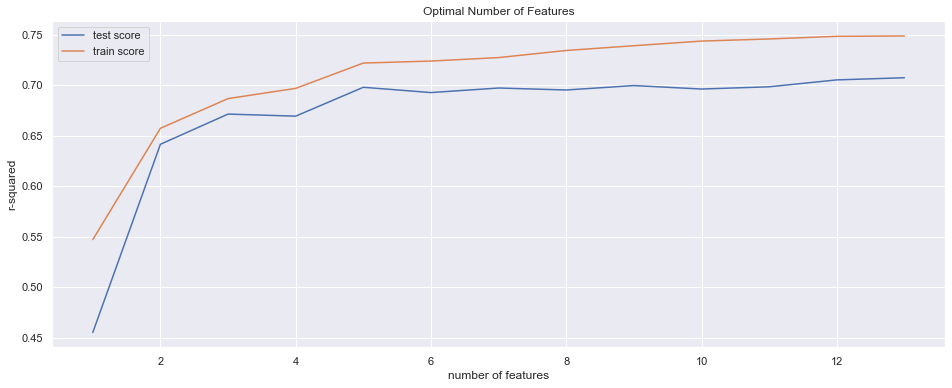

In [202]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### 2.3.2. Polynomial Regression

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'poly__degree': [2, 3, 4, 5, 6, 7]}]

pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])

poly_model_cv = GridSearchCV(pipeline,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

poly_model_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",poly_model_cv.best_params_)
print("best accuracy :",poly_model_cv.best_score_)

cv_results = pd.DataFrame(poly_model_cv.cv_results_)
cv_results


Fitting 5 folds for each of 6 candidates, totalling 30 fits
tuned hpyerparameters :(best parameters)  {'poly__degree': 2}
best accuracy : 0.833922361736984


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011399,0.006908,0.003366,0.000837,2,{'poly__degree': 2},0.808632,0.879147,0.875509,0.811072,...,0.833922,0.035866,1,0.937685,0.933754,0.930607,0.947995,0.934152,0.936839,0.006013
1,0.019305,0.002791,0.012075,0.009439,3,{'poly__degree': 3},-0.123566,0.680584,0.748641,0.665458,...,0.453347,0.329100,2,0.990526,0.991136,0.990079,0.992330,0.990042,0.990823,0.000851
2,0.040236,0.006721,0.007005,0.000621,4,{'poly__degree': 4},-2.301343,-2.389228,0.451967,-1.726852,...,-1.103303,1.288879,3,0.998389,0.998671,0.998752,0.998380,0.998373,0.998513,0.000164
3,0.097980,0.013988,0.014214,0.003026,5,{'poly__degree': 5},-2.308709,-0.175749,0.054320,-5.221452,...,-2.930819,2.782592,4,0.999447,0.999641,0.999624,0.999553,0.999515,0.999556,0.000071
4,0.224195,0.007554,0.025625,0.002608,6,{'poly__degree': 6},-3.580657,-6.163116,-3.049675,-66.907669,...,-17.913467,24.615534,5,0.999686,0.999830,0.999783,0.999789,0.999746,0.999767,0.000048
5,0.682322,0.192256,0.092266,0.052799,7,{'poly__degree': 7},-5.496622,-9.052490,-12.894161,-294.654513,...,-94.330467,113.995684,6,0.999790,0.999903,0.999835,0.999883,0.999818,0.999846,0.000042


In [204]:
y_pred = poly_model_cv.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8854555580810081


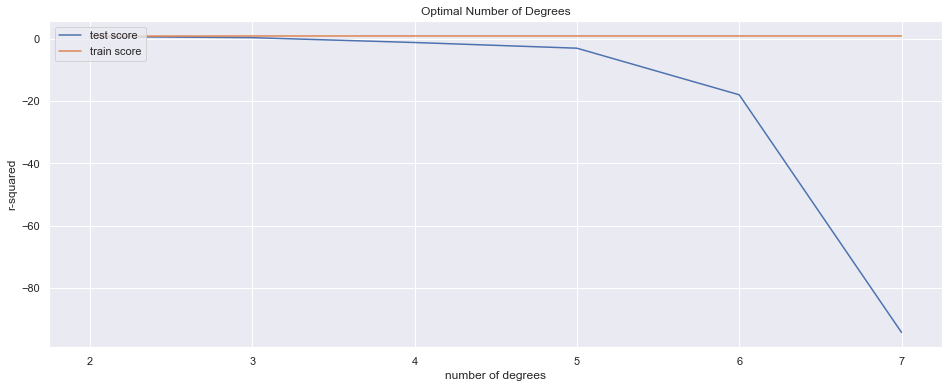

In [205]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_poly__degree"], cv_results["mean_test_score"])
plt.plot(cv_results["param_poly__degree"], cv_results["mean_train_score"])
plt.xlabel('number of degrees')
plt.ylabel('r-squared')
plt.title("Optimal Number of Degrees")
plt.legend(['test score', 'train score'], loc='upper left')

as you can see, R^2 is negative at more than three degrees, which means the trained model is worse than a horizontal line

### 2.3.2. Logistic Regression

Logistic Regression is a classification model, which can only predict binary outcome. It won't help us to predict house prices.

But the example shows a model to predict prices above a specific threshold.

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from numpy import *

pricing_threshold = 25
y_transformed = array(y_train)
y_transformed[y_transformed <= pricing_threshold] = 0
y_transformed[y_transformed > pricing_threshold] = 1

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_transformed)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.918148893360161


## Estimate the models’ performances on the test set again with two different error/performance measurements

- R^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
- MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.
- MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.
- RMSE: It shows how far predictions fall from measured true values using Euclidean distance.
- MedAE: Median absolute error regression loss.
- MAPE: Mean absolute percentage error regression loss.

In [207]:
import sklearn.metrics as metrics

def print_performance_statistics(y_pred):
    print('R^2:', metrics.r2_score(y_test, y_pred))
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('MedAE:', metrics.median_absolute_error(y_test, y_pred))
    print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

In [208]:
# Linear Regression
print_performance_statistics(linear_model_cv.predict(X_test))

R^2: 0.7435551192689285
MAE: 3.2220486179146435
MSE: 21.24798212000741
RMSE: 4.609553353634971
MedAE: 2.4264737478428833
MAPE: 0.18499661468759243


In [209]:
# Polynomial Regression
print_performance_statistics(poly_model_cv.predict(X_test))

R^2: 0.8854555580810081
MAE: 2.207554779620793
MSE: 9.490687616389913
RMSE: 3.080695962991141
MedAE: 1.5269838579026578
MAPE: 0.12124265314470103


## 2.5. Explain which model you would use in deployment and why

The polynomial regression model performs better than the linear regression. That's why we would use this model.
Our decision is based on R^2 and RMSE, but all other metrics are also better in polynominal regression
